# WASSA 2023 - Exploratory data analysis (EDA)
### Shared Task on Empathy Emotion and Personality Detection in Interactions

Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from wordcloud import WordCloud

Import dataset

In [2]:
# TODO: cambiare path?
train_essay_data = pd.read_csv('./datasets/WASSA23_essay_level_train_preproc.tsv', sep="\t")
dev_essay_data = pd.read_csv('./datasets/WASSA23_essay_level_dev_preproc.tsv', sep="\t")
test_essay_data = pd.read_csv('./datasets/WASSA23_essay_level_test_preproc.tsv', sep="\t")
# TODO: togliere
train_essay_data['emotion'] = train_essay_data['emotion'].str.lower()
dev_essay_data['emotion'] = dev_essay_data['emotion'].str.lower()

View dataset format

In [3]:
train_essay_data.head()

,empathy,distress,essay,emotion,gender,education,race,age,income,personality_conscientiousness,...,distress_count,prompt_bio,prompt_emp,prompt_emo,conversation_id,article_id,speaker_id,speaker_number,split,prompt
0,5.667,4.375,it is really diheartening to read about these ...,sadness,1.0,4.0,1.0,33.0,50000.0,6.0,...,3.199801,An essay written by a 33.0 years old white mal...,The essay expresses high empathy and medium di...,The top emotions expressed in the essay are: ...,NaN,NaN,NaN,NaN,NaN,NaN
1,4.833,4.875,the phone lines from the suicide prevention li...,sadness,1.0,4.0,1.0,33.0,50000.0,6.0,...,2.715752,An essay written by a 33.0 years old white mal...,The essay expresses medium empathy and medium ...,The top emotions expressed in the essay are: ...,NaN,NaN,NaN,NaN,NaN,NaN
2,5.333,3.500,"no matter what your heritage, you should be ab...",neutral,1.0,4.0,1.0,33.0,50000.0,6.0,...,2.954012,An essay written by a 33.0 years old white mal...,The essay expresses high empathy and medium di...,The top emotions expressed in the essay are: ...,NaN,NaN,NaN,NaN,NaN,NaN
3,4.167,5.250,it is frightening to learn about all these sha...,fear,1.0,4.0,1.0,33.0,50000.0,6.0,...,3.035200,An essay written by a 33.0 years old white mal...,The essay expresses medium empathy and high di...,The top emotions expressed in the essay are: ...,NaN,NaN,NaN,NaN,NaN,NaN
4,5.333,4.625,the eldest generation of russians aren't being...,sadness,1.0,4.0,1.0,33.0,50000.0,6.0,...,2.945490,An essay written by a 33.0 years old white mal...,The essay expresses high empathy and medium di...,The top emotions expressed in the essay are: ...,NaN,NaN,NaN,NaN,NaN,NaN


Datastets dimesions

In [4]:
print('# essays in Train set: %d' %len(train_essay_data))
print('# essays in Dev set: %d' %len(dev_essay_data))
print('# essays in (Train + Dev) set: %d' %(len(train_essay_data) + len(dev_essay_data)))
print('# essays in Test set: %d' %len(test_essay_data))

# essays in Train set: 2437
# essays in Dev set: 208
# essays in (Train + Dev) set: 2645
# essays in Test set: 100


Drop 'unkown' values

In [5]:
train_essay_data = train_essay_data[train_essay_data != 'unknown'] # TODO: qui!
dev_essay_data = dev_essay_data[dev_essay_data != 'unknown']
test_essay_data = test_essay_data[test_essay_data != 'unknown']

In [6]:
if True in train_essay_data.isnull().values:
    print('There are NaN values in Train set')
else:
    print('There aren\'t NaN values in Train set')
    
if True in dev_essay_data.isnull().values:
    print('There are NaN values in Dev set')
else:
    print('There aren\'t NaN values in Dev set')

There are NaN values in Train set
There aren't NaN values in Dev set


New datasets dimensions

In [7]:
print('# essays in Train set: %d' %len(train_essay_data))
print('# essays in Dev set: %d' %len(dev_essay_data))
print('# essays in (Train + Dev) set: %d' %(len(train_essay_data) + len(dev_essay_data)))
print('# essays in Test set: %d' %len(test_essay_data))

# essays in Train set: 2437
# essays in Dev set: 208
# essays in (Train + Dev) set: 2645
# essays in Test set: 100


Number of speakers

In [8]:
print('# speakers in Train set: %d'%len(train_essay_data['speaker_id'].unique()))
print('# speakers in Dev set: %d'%len(dev_essay_data['speaker_id'].unique()))
print('# essays in Test set: %d' %len(test_essay_data['speaker_id'].unique()))

# speakers in Train set: 36
# speakers in Dev set: 41
# essays in Test set: 65


Essay length statistics

[Text(0.5, 1.0, 'Dev data'),
 Text(0.5, 0, 'Number of words'),
 Text(0, 0.5, 'Number of essays')]

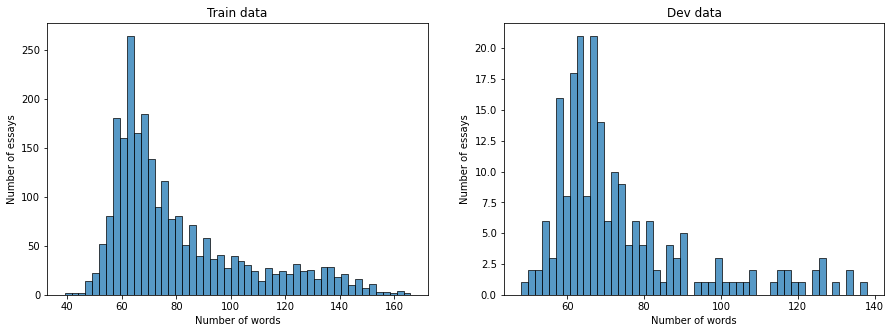

In [9]:
train_essay_data['essay_word_count'] = train_essay_data['essay'].apply(lambda x: len(x.split()))
dev_essay_data['essay_word_count'] = dev_essay_data['essay'].apply(lambda x: len(x.split()))

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(train_essay_data['essay_word_count'], bins=50, ax=ax1).set(title='Train data', xlabel='Number of words', ylabel='Number of essays')
sns.histplot(dev_essay_data['essay_word_count'], bins=50, ax=ax2).set(title='Dev data', xlabel='Number of words', ylabel='Number of essays')


Statitics on Train data

In [10]:
train_essay_data['essay_word_count'].describe()

count    2437.000000
mean       80.515388
std        24.943390
min        39.000000
25%        63.000000
50%        72.000000
75%        91.000000
max       166.000000
Name: essay_word_count, dtype: float64

Statistics on Dev data

In [11]:
dev_essay_data['essay_word_count'].describe()

count    208.000000
mean      73.836538
std       18.776648
min       48.000000
25%       62.000000
50%       67.000000
75%       79.000000
max      138.000000
Name: essay_word_count, dtype: float64

Emotion labels

In [12]:
emotions = []
for perceived_emotion in train_essay_data['emotion'].unique():
	for emotion in perceived_emotion.split('/'):
		if emotion not in emotions:
			emotions.append(emotion)
emotions

['sadness', 'neutral', 'fear', 'anger', 'disgust', 'surprise', 'joy', 'hope']

One hot encode emotions

In [13]:
for emotion in emotions:
	train_essay_data[emotion] = train_essay_data["emotion"].str.contains(emotion).astype(int)
	dev_essay_data[emotion] = dev_essay_data["emotion"].str.contains(emotion).astype(int)

Emotions distributions

In [14]:
train_counts = pd.DataFrame(train_essay_data[emotions].sum(), columns=['Training set'])
train_perc = pd.DataFrame(train_essay_data[emotions].sum()/len(train_essay_data)*100, columns=['% Training set'])
dev_counts = pd.DataFrame(dev_essay_data[emotions].sum(), columns=['Development set'])
dev_perc = pd.DataFrame(dev_essay_data[emotions].sum()/len(dev_essay_data)*100, columns=['% Development set'])
pd.concat([train_counts, dev_counts, train_perc, dev_perc], axis=1)

,Training set,Development set,% Training set,% Development set
sadness,622,101,25.523184,48.557692
neutral,546,54,22.404596,25.961538
fear,259,8,10.627821,3.846154
anger,543,38,22.281494,18.269231
disgust,257,24,10.545753,11.538462
surprise,194,3,7.960607,1.442308
joy,104,2,4.267542,0.961538
hope,107,16,4.390644,7.692308


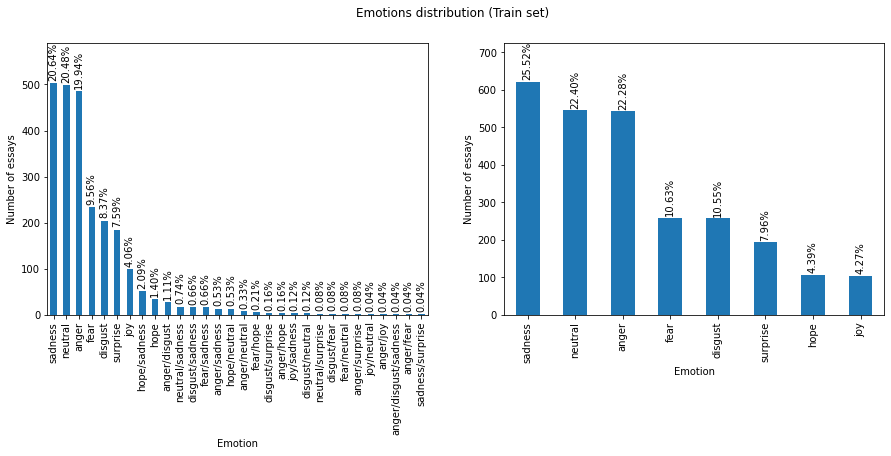

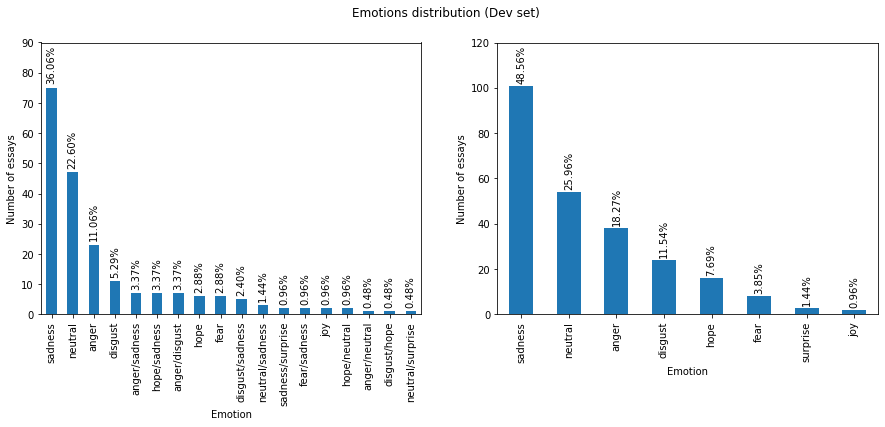

In [15]:
def add_percentages(ax, tot, ylim, height_incr, rotation=90):
	for p in ax.patches:
		width = p.get_width()
		height = p.get_height()
		x, y = p.get_xy() 
		perc = (height / tot)*100
		ax.annotate('%.2f%%'%perc, (x + width/2, y+height+height_incr), ha='center', rotation=rotation)
	ax.set_ylim(0, ylim)

def plot_emotions_distribution(data, title, perc=True, perc_height=5, ylim=(600, 700)):
	_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

	data['emotion'].value_counts().plot(
		kind='bar',
		xlabel='Emotion',
		ylabel='Number of essays',
		ax=ax1
	)

	if perc:
		add_percentages(ax1, len(data['emotion']), ylim[0], perc_height, rotation=90)
	
	data[emotions].sum().sort_values(ascending=False).plot(
		kind='bar',
		xlabel='Emotion',
		ylabel='Number of essays',
		ax=ax2
		)
	
	if perc:
		add_percentages(ax2, len(data[emotions]), ylim[1], perc_height, rotation=90)

	plt.suptitle(title)
	plt.plot()

plot_emotions_distribution(train_essay_data, 'Emotions distribution (Train set)', perc=True, perc_height=10, ylim=(590, 725))
plot_emotions_distribution(dev_essay_data, 'Emotions distribution (Dev set)', perc=True, perc_height=2, ylim=(90, 120))

Number of essays expressing more than one emotion

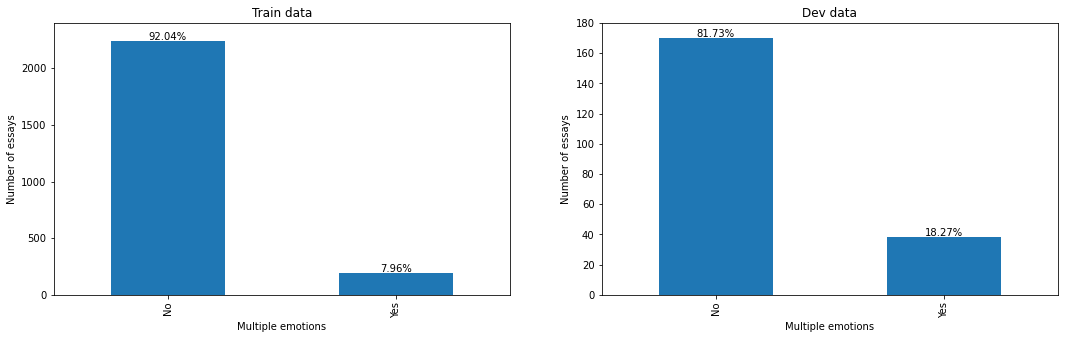

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))

train_essay_data['multiple_emotions'] = train_essay_data['emotion'].apply(lambda x: "Yes" if len(x.split("/")) > 1 else "No")
dev_essay_data['multiple_emotions'] = dev_essay_data['emotion'].apply(lambda x: "Yes" if len(x.split("/")) > 1 else "No")

train_essay_data['multiple_emotions'].value_counts().plot(
    kind='bar', title='Train data', xlabel='Multiple emotions', ylabel='Number of essays', ax=ax1)
add_percentages(ax1, len(train_essay_data['multiple_emotions']), 2400, 5, rotation=0)
dev_essay_data['multiple_emotions'].value_counts().plot(
    kind='bar', title='Dev data', xlabel='Multiple emotions', ylabel='Number of essays', ax=ax2)
add_percentages(ax2, len(dev_essay_data['multiple_emotions']), 180, 1, rotation=0)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/irenetesta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text(0.5, 1.0, 'Dev data')

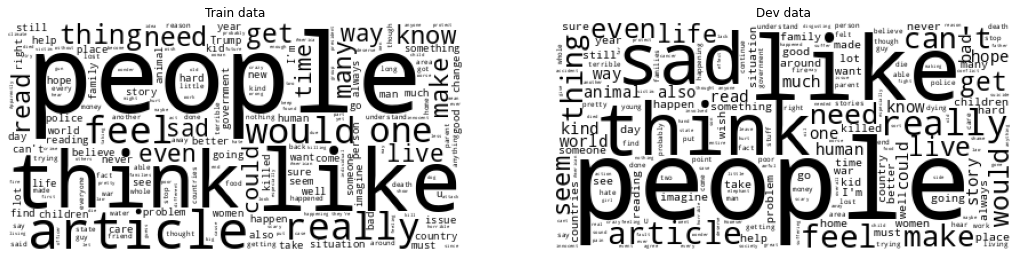

In [17]:
from wordcloud import STOPWORDS # += 'people' ?

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))

word_cloud_all_train = WordCloud(
    stopwords=stopwords, #STOPWORDS,
    collocations=False,
    background_color='white',
    color_func=lambda *args,
    **kwargs: "black"
    ).generate(' '.join(train_essay_data['essay'].tolist()))
ax1.imshow(word_cloud_all_train)
ax1.axis('off')
ax1.set_title('Train data')

word_cloud_all_dev = WordCloud(
    stopwords=stopwords, #STOPWORDS,
    collocations=False,
    background_color='white',
    color_func=lambda *args,
    **kwargs: "black"
    ).generate(' '.join(dev_essay_data['essay'].tolist()))
ax2.imshow(word_cloud_all_dev)
ax2.axis('off')
ax2.set_title('Dev data')

In [18]:
# TODO: word cloud for each emotion (colora parole di emozione che sono nel lessico)

Looking at essays labeled with 'joy'

In [19]:
pd.set_option('display.max_colwidth', None)
joy_essays_train = train_essay_data[train_essay_data['joy']==1][['essay','article_id', 'emotion']]
joy_essays_train['split'] = 'Train'
joy_essays_dev = dev_essay_data[dev_essay_data['joy']==1][['essay','article_id', 'emotion']]
joy_essays_dev['split'] = 'Dev'
joy_essays = pd.concat([joy_essays_train, joy_essays_dev], ignore_index=True)
joy_essays

,essay,article_id,emotion,split
0,It's too bad that we are still in the middle east. I wish Trump would just pull out of the middle east entirely so our soldiers will stop being targets for all the countries that hate us. The longer we are there the easier we make it for them to inflict damage to our troops. It must not be easy for them to be there away from their families.,NaN,joy,Train
1,"I wish there was something more that I could do. This is getting out of hand, but it's kind of far away geographically from us. There needs to be something the international community can do. Farmers everywhere are killing pests and animals that interfere with their farms, but elephants are completely different from pests. They are extremely smart and are just hungry. I honestly wonder if we should come up with a plan to feed them, and this might sound crazy, but try to study elephants and come up with some way to communicate abstract ideas with them.",NaN,joy,Train
2,"I know this article is super wordy, but it is an interesting read, if you have a chance ad you are bored, make sure you read it. It is about how Democrats will move forward in the next few years to get legoslation moving. It has been hard with Trump in the White House for the whole country, but imagine being a democrat right now trying to push legislation that your constituents are asking about? What a time to be alive! We should all just try to make the country a lot better right now!",NaN,joy,Train
3,"It does seem silly that people in committed relationships are still affected by the donating ban, but I can also understand why such a ban was put in place. The trouble with anything is that when you try to protect some people, others rights seem to always be infringed and we're forced to decide which offense is greater and more important. I don't see why someone can't be tested, found to be clean and then give blood but I can understand why especially in an emergency when things can easily get overlooked the ban is a good idea.",NaN,joy,Train
4,I feel like entraprenerurship is the future. Apparently they are making it so you can quit your job and get unemployment benefits. It's pretty awesome. I guess they want to encourage people to start unique businesses on their own in an effort to diversify the workfroce in the country. Pretty cool if you ask me.,NaN,joy,Train
...,...,...,...,...
101,"This is sad, I have not heard of this Indian Pakistani issue but it sounds like it is affecting a lot of people and a lot of lives. I can't imagine living somewhere where you constantly had to fear being bombed or shot or some catastrophe like that that caused imminent death or bodily harm. It would just be so stressful and difficult to have to live like that. I get worried about things like getting sick but jeez this just takes it to an all new level. It makes me very grateful to live where I am instead of somewhere like that.",NaN,joy/sadness,Train
102,"I think it's always tragic when someone dies, but when that someone is a milestone type person it's even worse. How wonderful to be the first Chinese woman to be a fighter pilot and then how tragic to be killed in such a way. I have so much respect for trailblazers and it always seems like such a waste for them to be taken from us in such a seemingly meaningless manner. So proud of her accomplishments.",150.0,joy,Train
103,"It's very difficult to fathom living somewhere where airstrikes can take you out at any given moment, regardless of where you are. It really makes me grateful to live in this beautiful nation where we live, America, and to have the freedoms that we have. In this story, the man's eight children lost their father and his wife lost her partner. That is very tragic, and all for a bunch of senseless killing. The US was supporting these airstrikes which is sort of sad. I find the whole situation over there so senseless. IT's like they are all just killing each other nonstop for no valid reason.",367.0,joy/sadness,Train
104,Yo

Looking at essays labeled with 'neutral' and other emotions

In [20]:
neutral_essays_train = train_essay_data[
    (train_essay_data['emotion'].str.contains('neutral')) & (train_essay_data['emotion'].str.contains('/'))
    ][['essay','article_id', 'emotion']]
neutral_essays_train['split'] = 'Train'
neutral_essays_dev = dev_essay_data[
    (dev_essay_data['emotion'].str.contains('neutral')) & (dev_essay_data['emotion'].str.contains('/'))
    ][['essay','article_id', 'emotion']]
neutral_essays_dev['split'] = 'Dev'
neutral_essays = pd.concat([neutral_essays_train, neutral_essays_dev], ignore_index=True)
neutral_essays

,essay,article_id,emotion,split
0,"I am writing as regards my thoughts for Polar bears, the poster-child for climate change, are among the animals most affected by the seasonal and year-to-year changes in Arctic sea ice, because they rely on this surface for essential activities such as hunting, traveling and breeding. The researchers recommend that the National Climate Assessment incorporate the timing of spring ice retreat and fall ice advance as measures of climate change in future reports. The study's results currently are used by the International Union for Conservation of Nature's polar bear specialist group, which completes assessments of polar bears and issues the species' conservation status. I am really pleased with this information.",NaN,joy/neutral,Train
1,Four people were killed in a train crash that happened in Spain's northwest region. The train's carriage had flipped on its side after hitting a bridge near the train tracks. Fifty more people were injured. It is a true tragedy for this community to suffer a horrific accident of this nature. I feel for the people of the area.,NaN,neutral/sadness,Train
2,"I have mixed feelings about this story, for sure. On the one hand, I feel sad for the woman who lost her dog. I had a black lab mix when I was younger and she's gone now and I still miss her. Dogs are members of the family, so when they go it's very difficult. This is tantamount to having someone you loved murdered. However, and it's a big however, I find it completely unacceptable for people to have to be afraid of uncontrolled dogs. I know people who've been bit in the face by dogs. People are killed by dogs. Dogs are weapons, too. No one should have to walk in a park--especially one that doesn't allow pets off leashes--and worry about being attacked. Do I think the guy overreacted by killing the dog? Yes. But the woman shouldn't have done what she was doing either.",NaN,neutral/sadness,Train
3,"Dear friend, I have just finished reading an article about Janet Reno. She was the first female US Attorney General. She had a very impressive professional and legal career. I am saddened by her death, she died at the age of seventy eight. She had a productive life.",NaN,neutral/sadness,Train
4,"This was a very short article without a lot of context to it. It did not tell why the man with the assault style weapon killed the man that was in his seventy's. At first, I thought it was going to be about a man that was denied the right to vote, but that story proved to be false. I do feel sorry for any body who loses their life to gun violence.",NaN,neutral/sadness,Train
5,This news story is about how more and more kids are overdosing on opioids. They are finding in laying around their house or figuring out how to open bottles. Most of the cases are from parents in the home having prescriptions for the opioid. I think this is so sad and is part of a larger problem of opioid addiction.,NaN,neutral/sadness,Train
6,"I feel very sorry for the girl who lost her eye slight to the pallet gun. It is a new way of thinking about non deathly weapons. I think the girl's father was right and wrong at the same time. I think it is better that she was not killed, but I understand his and her pain about her losing the ability to see and how it changed her life.",NaN,neutral/sadness,Train
7,"So sad about all the birds that die in wind turbines. It seems that every move you make, every footstep is to the detriment of something else, even if you're trying to do something good. It's so sad how violent and chaotic and painful life is. You can't walk without out killing a bug under your feet, every step is death. It makes it all so so worthless sometimes. Have a great day.",NaN,neutral/sadness,Train
8,"So, I just read an article about a baby rhino that passed away in captivity; apparently, due to lack of power? The article was very vague, but the woman describing the situation spoke of the rhino like a member of her family. The whole thing was very

Looking at essays with low empathy

In [21]:
train_essay_data[train_essay_data['empathy']<=1]

,empathy,distress,essay,emotion,gender,education,race,age,income,personality_conscientiousness,...,prompt_bio,prompt_emp,prompt_emo,conversation_id,article_id,speaker_id,speaker_number,split,prompt,multiple_emotions
16,1.0,4.125,"This is a crazy story with so many facets to it, omg. I mean on one hand, I don't support an eye for an eye. I don't support the death penalty and I don't support blinding someone. BUT on the other hand, this is a country where women really struggle and the justice system is not well developed. ALSO, he blinded a FOUR YEAR OLD GIRL. What the fuck is wrong with this guy. So if this was in America I would not support it, but I don't feel right condemning the actions of an entirely different country for doing what they felt needed to be done.",anger,2.0,6.0,1.0,31.0,32000.0,6.00,...,"An essay written by a 31.0 years old white female, with a four year bachelor's degree, with an income of 32000.0$.",The essay expresses low empathy and medium distress levels.,The top emotions expressed in the essay are: negative.,NaN,NaN,NaN,NaN,NaN,NaN,No
34,1.0,1.000,"This doesn't sound too worrisome to me. If you are affected by depression, then you should decide as an individual to find another option. It's just a side effect, I think there are many medicines out there that have depression as a side effect. It is something that individuals should be aware of, but nothing critical.",neutral,1.0,6.0,5.0,36.0,50000.0,1.50,...,"An essay written by a 36.0 years old asian/pacific islander male, with a four year bachelor's degree, with an income of 50000.0$.",The essay expresses low empathy and low distress levels.,"The top emotions expressed in the essay are: negative, sadness.",NaN,NaN,NaN,NaN,NaN,NaN,No
36,1.0,5.500,"Some people are just disturbed. Everyone is going to point to mental illness in something like this, but I fear that when things like this happens, it gets easier and easier just to point at people and call them mentally ill. I fear that eventually we are going to get to the point where you can classify someone as mentally ill by the crowd. Just finger pointing. I feel for these victims and the victims of crimes in the future because we spend too much time making excuses and pointing fingers rather than dealing with the problems at hand.",fear,1.0,5.0,1.0,28.0,62000.0,4.00,...,"An essay written by a 28.0 years old white male, with a two year associate degree, with an income of 62000.0$.",The essay expresses low empathy and high distress levels.,The top emotions expressed in the essay are: negative.,NaN,NaN,NaN,NaN,NaN,NaN,No
45,1.0,4.500,"How disgusting is Wells Fargo? It's unbelievable the way they treated their tellers, and all those fake accounts? Can you even? I don't understand how this bank doesn't get shut down. You really should think about getting an account with a different bank, you know. What if your SS got used to make some of those accounts?",anger,2.0,4.0,1.0,38.0,20000.0,3.00,...,"An essay written by a 38.0 years old white female, went to college, with an income of 20000.0$.",The essay expresses low empathy and medium distress levels.,The top emotions expressed in the essay are: trust.,NaN,NaN,NaN,NaN,NaN,NaN,No
48,1.0,1.000,"You know how you were having trouble sleeping? Here, read about people who have tinnitus - it'll put you to sleep. I feel like more should be done to help the seven percent who say their tinnitus is a big problem for them, though. That's the same as any other psychiatric complaint, right? If it's affecting your life so that you can't function normally, there should be some kind of help for you",neutral,2.0,4.0,1.0,38.0,20000.0,3.00,...,"An essay written by a 38.0 years old white female, went to college, with an income of 20000.0$.",The essay expresses low empathy and low distress levels.,The top emotions expressed in the essay are: negative.,NaN,NaN,NaN,NaN,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2421,1.0,2.250,"I d

Looking at essays with high empathy

In [22]:
train_essay_data[train_essay_data['empathy']>=7]

,empathy,distress,essay,emotion,gender,education,race,age,income,personality_conscientiousness,...,prompt_bio,prompt_emp,prompt_emo,conversation_id,article_id,speaker_id,speaker_number,split,prompt,multiple_emotions
32,7.0,7.000,It's shocking how little people care about this and how little Africa gets mentioned in the news. This is horrific when you think about the number of victims and the people who are harmed. I wish people could focus on this. It's ridiculous that people are getting away with this and it is a huge crisis on the level of other genocides in history.,surprise,1.0,6.0,5.0,36.0,50000.0,1.5,...,"An essay written by a 36.0 years old asian/pacific islander male, with a four year bachelor's degree, with an income of 50000.0$.",The essay expresses high empathy and high distress levels.,The top emotions expressed in the essay are: negative.,NaN,NaN,NaN,NaN,NaN,NaN,No
108,7.0,4.000,"I really feel bad for the Yemeni people. They were already unfortunate enough before this civil unrest. Now it has gotten worse and too many people are dying. I really pray that there is some order and that peace comes to this country. I feel for the family members of the the sick, wounded, and dead.",sadness,1.0,4.0,2.0,30.0,19000.0,7.0,...,"An essay written by a 30.0 years old hispanic or latino male, went to college, with an income of 19000.0$.",The essay expresses high empathy and medium distress levels.,The top emotions expressed in the essay are: sadness.,NaN,NaN,NaN,NaN,NaN,NaN,No
113,7.0,1.750,"The pipeline seems to be interfering with native american tribes and is causing lots of enviornmental damage. I do feel for these individuals, and it's important they get all the help they deserve. Their anscestors were decimated throughout history and there isnt enough reparations to solve the genocide that was caused.",sadness,1.0,5.0,5.0,27.0,100000.0,7.0,...,"An essay written by a 27.0 years old asian/pacific islander male, with a two year associate degree, with an income of 100000.0$.",The essay expresses high empathy and low distress levels.,"The top emotions expressed in the essay are: anger, trust, positive.",NaN,NaN,NaN,NaN,NaN,NaN,No
114,7.0,7.000,Polar bears deserve the respect they deserve. They do not deserve to be treated the way they are now. There's no reason to kill these animals and it disgusts me that humans exist just to cause harm to them. I hope one day there's a collective effort to stop the growing genocide of these gentle and humble creatures.,disgust,1.0,5.0,5.0,27.0,100000.0,7.0,...,"An essay written by a 27.0 years old asian/pacific islander male, with a two year associate degree, with an income of 100000.0$.",The essay expresses high empathy and high distress levels.,The top emotions expressed in the essay are: positive.,NaN,NaN,NaN,NaN,NaN,NaN,No
323,7.0,1.875,"I think that these types of tragic accidents are far and few. I might be wrong, though I don't hear of too many of them. I think that they may need to reevaluate some of their maintenance techniques to try and make this even more uncommon. It must of really devastated the family and friends of those who lost their lives.",sadness,1.0,6.0,1.0,32.0,39000.0,7.0,...,"An essay written by a 32.0 years old white male, with a four year bachelor's degree, with an income of 39000.0$.",The essay expresses high empathy and low distress levels.,The top emotions expressed in the essay are: negative.,NaN,NaN,NaN,NaN,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2304,7.0,5.750,"This is so sad. I hadn't heard of this happening, but US strikes in Afghanistan ended up killing many civilians. One of the strikes actually hit an emergency hospital that Doctors without Borders was operating. A lot of the patients and the staff were killed. It just sounds horrible. Relatives were trying to walk through the streets with the bodies of their dead children. I can't even imagine what it would be like for these people.",sadness,2.0

Looking at essays with low distress

In [23]:
train_essay_data[train_essay_data['distress']<=1]

,empathy,distress,essay,emotion,gender,education,race,age,income,personality_conscientiousness,...,prompt_bio,prompt_emp,prompt_emo,conversation_id,article_id,speaker_id,speaker_number,split,prompt,multiple_emotions
34,1.000000,1.0,"This doesn't sound too worrisome to me. If you are affected by depression, then you should decide as an individual to find another option. It's just a side effect, I think there are many medicines out there that have depression as a side effect. It is something that individuals should be aware of, but nothing critical.",neutral,1.0,6.0,5.0,36.0,50000.0,1.5,...,"An essay written by a 36.0 years old asian/pacific islander male, with a four year bachelor's degree, with an income of 50000.0$.",The essay expresses low empathy and low distress levels.,"The top emotions expressed in the essay are: negative, sadness.",NaN,NaN,NaN,NaN,NaN,NaN,No
48,1.000000,1.0,"You know how you were having trouble sleeping? Here, read about people who have tinnitus - it'll put you to sleep. I feel like more should be done to help the seven percent who say their tinnitus is a big problem for them, though. That's the same as any other psychiatric complaint, right? If it's affecting your life so that you can't function normally, there should be some kind of help for you",neutral,2.0,4.0,1.0,38.0,20000.0,3.0,...,"An essay written by a 38.0 years old white female, went to college, with an income of 20000.0$.",The essay expresses low empathy and low distress levels.,The top emotions expressed in the essay are: negative.,NaN,NaN,NaN,NaN,NaN,NaN,No
50,1.167000,1.0,"I just read an article about America's refugee problem, that talked about the Somali community in Minneapolis. I can't believe the emotional language they tried to use in the article; it just makes me sick to see any reporting that doesn't only concern the facts, with no editorializing by the author. I wish that everyone who decided to become a writer would learn that there is no place for opinion in the news.",sadness,1.0,4.0,1.0,34.0,55000.0,7.0,...,"An essay written by a 34.0 years old white male, went to college, with an income of 55000.0$.",The essay expresses low empathy and low distress levels.,The top emotions expressed in the essay are: positive.,NaN,NaN,NaN,NaN,NaN,NaN,No
52,1.000000,1.0,"So, I had to read an article about somebody named Kylie Jenner, and evidently she has some sort of makeup line or something. Anyway, evidently she must be popular for some reason, because people are making counterfeit cosmetics and selling them as her brand. She put out some message about how you should only buy direct from her website. I guess a sucker is born every minute.",neutral,1.0,4.0,1.0,34.0,55000.0,7.0,...,"An essay written by a 34.0 years old white male, went to college, with an income of 55000.0$.",The essay expresses low empathy and low distress levels.,"The top emotions expressed in the essay are: anger, surprise, positive, negative.",NaN,NaN,NaN,NaN,NaN,NaN,No
53,1.000000,1.0,"I read an article about Typhoon Meranti. The article said the storm passed by Taiwan without actually hitting the island, which I suppose was a good thing, because evidently there was another storm in 2009, Typhone Morakot, that killed a bunch of people and did billions of dollars of damage. I'm glad I don't live somewhere where there's any inclement weather like that, it must be miserable to live on an island where it's hot and crowded.",neutral,1.0,4.0,1.0,34.0,55000.0,7.0,...,"An essay written by a 34.0 years old white male, went to college, with an income of 55000.0$.",The essay expresses low empathy and low distress levels.,"The top emotions expressed in the essay are: anger, negative.",NaN,NaN,NaN,NaN,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2372,1.166667,1.0,"So, I guess I just read a write up on the life of Janet Reno. The whole thing was pretty middling and seemed unbiased. Based on the information presented it seemed like

Looking at essays with high distress

In [24]:
train_essay_data[train_essay_data['distress']>=7]

,empathy,distress,essay,emotion,gender,education,race,age,income,personality_conscientiousness,...,prompt_bio,prompt_emp,prompt_emo,conversation_id,article_id,speaker_id,speaker_number,split,prompt,multiple_emotions
30,6.333000,7.0,"I wish there was something more that I could do. This is getting out of hand, but it's kind of far away geographically from us. There needs to be something the international community can do. Farmers everywhere are killing pests and animals that interfere with their farms, but elephants are completely different from pests. They are extremely smart and are just hungry. I honestly wonder if we should come up with a plan to feed them, and this might sound crazy, but try to study elephants and come up with some way to communicate abstract ideas with them.",joy,1.0,6.0,5.0,36.0,50000.0,1.5,...,"An essay written by a 36.0 years old asian/pacific islander male, with a four year bachelor's degree, with an income of 50000.0$.",The essay expresses high empathy and high distress levels.,The top emotions expressed in the essay are: positive.,NaN,NaN,NaN,NaN,NaN,NaN,No
31,5.833000,7.0,"Climate change is extremely worrisome. And it is getting worse and worse every year. Something has to be done about it, and I think it starts with getting rid of corporate contributions to politicians and getting rid of lobbying. The world is dying and I think that needs to be clearly communicated to as many people as possible. Too many CEO's are thinking about their own profits. The system needs to limit their power and start focusing on the health of the species and the planet instead.",fear,1.0,6.0,5.0,36.0,50000.0,1.5,...,"An essay written by a 36.0 years old asian/pacific islander male, with a four year bachelor's degree, with an income of 50000.0$.",The essay expresses high empathy and high distress levels.,The top emotions expressed in the essay are: fear.,NaN,NaN,NaN,NaN,NaN,NaN,No
32,7.000000,7.0,It's shocking how little people care about this and how little Africa gets mentioned in the news. This is horrific when you think about the number of victims and the people who are harmed. I wish people could focus on this. It's ridiculous that people are getting away with this and it is a huge crisis on the level of other genocides in history.,surprise,1.0,6.0,5.0,36.0,50000.0,1.5,...,"An essay written by a 36.0 years old asian/pacific islander male, with a four year bachelor's degree, with an income of 50000.0$.",The essay expresses high empathy and high distress levels.,The top emotions expressed in the essay are: negative.,NaN,NaN,NaN,NaN,NaN,NaN,No
37,5.000000,7.0,"Every time I hear something about ISIS, I can't help but think about the role the US played in its creation and the horrors that have come from the vacuum of power in the region. I'm thankful to be American when I read something like this, but also ashamed at the same time in who we've chosen to represent us, not just now, but over the past 30 years.",sadness,1.0,5.0,1.0,28.0,62000.0,4.0,...,"An essay written by a 28.0 years old white male, with a two year associate degree, with an income of 62000.0$.",The essay expresses high empathy and high distress levels.,"The top emotions expressed in the essay are: positive, negative, sadness, anticipation.",NaN,NaN,NaN,NaN,NaN,NaN,No
87,6.000000,7.0,"This article is just awful. Boko Haram is an extremist group that needs to be stopped by any means necessary. The fact of the matter is these people are using religion as an excuse to rape and kill woman and children, and thats one of the most unmoral and unethical things I can think of. These poor women and children are not only kidnapped and drugged, but they are also dealing with being raped and having their loved ones killed. This is an awful and tragic issue, and this is something that needs to be shown throughout the entire world that these people are bad and need to be stopped.",disgust,1.0,4.0,1.0,26.0,35000.0,7.0,...,"An essay written by a 26.0 years old white male, 

Empathy and distress statistics

Train data

In [25]:
train_essay_data[["empathy", "distress"]].describe()

,empathy,distress
count,2437.000000,2437.000000
mean,3.763922,3.700759
std,1.918157,1.952582
min,1.000000,1.000000
25%,2.000000,1.750000
50%,4.000000,3.750000
75%,5.500000,5.500000
max,7.000000,7.000000


Dev data

In [26]:
dev_essay_data[["empathy", "distress"]].describe()

,empathy,distress
count,208.000000,208.000000
mean,4.329327,3.801082
std,1.671205,1.761442
min,1.000000,1.000000
25%,3.500000,2.343750
50%,4.166667,3.625000
75%,6.000000,5.625000
max,7.000000,7.000000


[Text(0.5, 1.0, 'Dev set')]

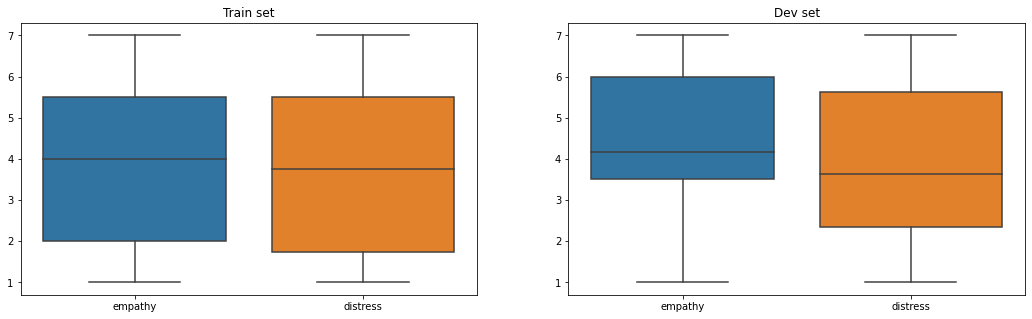

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
sns.boxplot(data=train_essay_data[["empathy", "distress"]], ax=ax1).set(title='Train set')
sns.boxplot(data=dev_essay_data[["empathy", "distress"]], ax=ax2).set(title='Dev set')

[Text(0.5, 1.0, 'Dev set')]

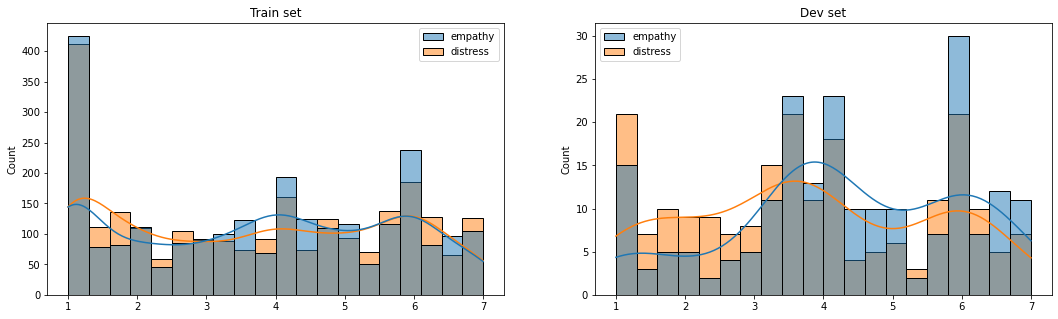

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
sns.histplot(data=train_essay_data[["empathy", "distress"]], bins=20, kde=True, ax=ax1).set(title="Train set")
sns.histplot(data=dev_essay_data[["empathy", "distress"]], bins=20, kde=True, ax=ax2).set(title="Dev set")

In [29]:
emp_dist_pearson = stats.pearsonr(train_essay_data['empathy'], train_essay_data['distress'])
print(f"Pearson correlation between empathy and distress: {emp_dist_pearson[0]}; P-value: {emp_dist_pearson[1]}")

Pearson correlation between empathy and distress: 0.5212625240126534; P-value: 6.971109285417443e-170


[]

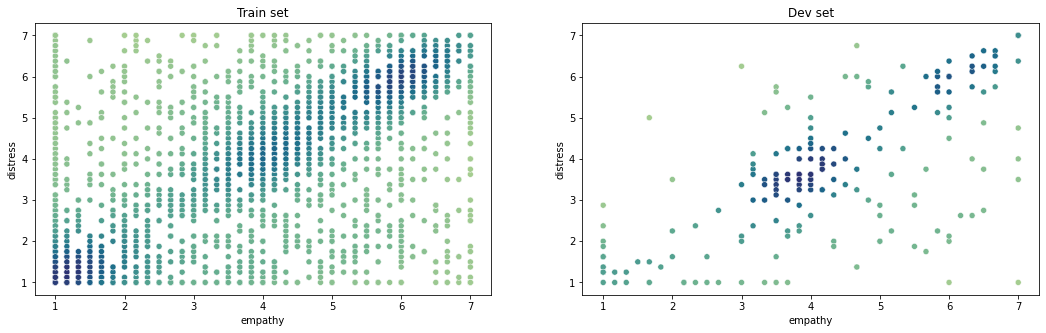

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))

values = np.vstack([train_essay_data["empathy"], train_essay_data["distress"]])
kernel = stats.gaussian_kde(values)(values)
sns.scatterplot(x='empathy', y='distress', data=train_essay_data, c=kernel, cmap="crest", ax=ax1).set(title='Train set')

values = np.vstack([dev_essay_data["empathy"], dev_essay_data["distress"]])
kernel = stats.gaussian_kde(values)(values)
sns.scatterplot(x='empathy', y='distress', data=dev_essay_data, c=kernel, cmap="crest", ax=ax2).set(title='Dev set')

plt.plot()

Coorelation between lexical empathy and distress counts and targets

[]

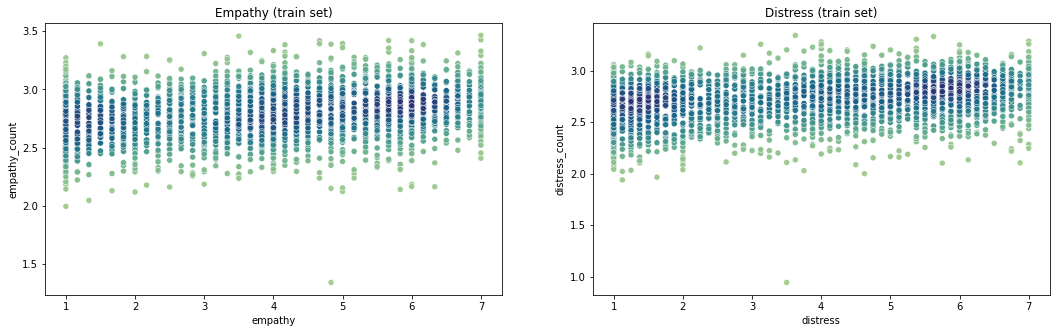

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))

values = np.vstack([train_essay_data["empathy"], train_essay_data["empathy_count"]])
kernel = stats.gaussian_kde(values)(values)
sns.scatterplot(x='empathy', y='empathy_count', data=train_essay_data, c=kernel, cmap="crest", ax=ax1).set(title='Empathy (train set)')

values = np.vstack([train_essay_data["distress"], train_essay_data["distress_count"]])
kernel = stats.gaussian_kde(values)(values)
sns.scatterplot(x='distress', y='distress_count', data=train_essay_data, c=kernel, cmap="crest", ax=ax2).set(title='Distress (train set)')

plt.plot()

In [32]:
emp_lex_corr = stats.pearsonr(train_essay_data['empathy'], train_essay_data['empathy_count'])
dist_lex_corr = stats.pearsonr(train_essay_data['distress'], train_essay_data['distress_count'])
print(f"Correlation between targets and lexical features for empathy:{emp_lex_corr}")
print(f"Correlation between targets and lexical features for distress:{dist_lex_corr}")

Correlation between targets and lexical features for empathy:(0.2668456198342166, 5.267805515696617e-41)
Correlation between targets and lexical features for distress:(0.2842517512998954, 1.6038896104842753e-46)


Plot empathy and distress lexica values

[]

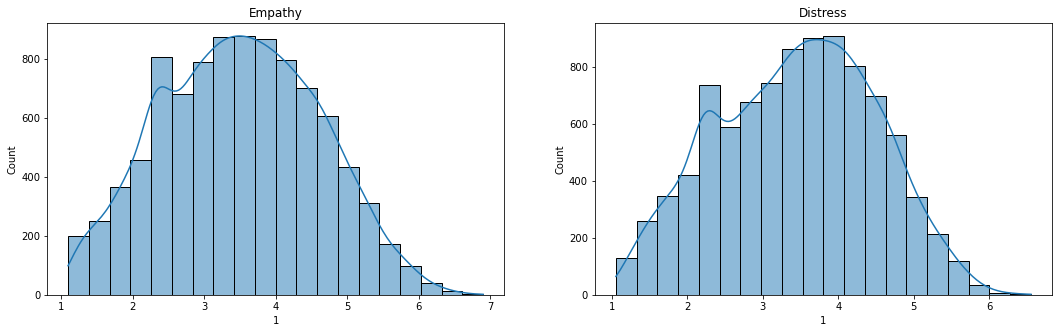

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))

empathy_lex = pd.read_csv('./lexicon/empathy.txt', header=None)
distress_lex = pd.read_csv('./lexicon/distress.txt', header=None)

sns.histplot(data=empathy_lex[1], bins=20, kde=True, ax=ax1).set(title="Empathy")
sns.histplot(data=distress_lex[1], bins=20, kde=True, ax=ax2).set(title="Distress")

plt.plot()

[]

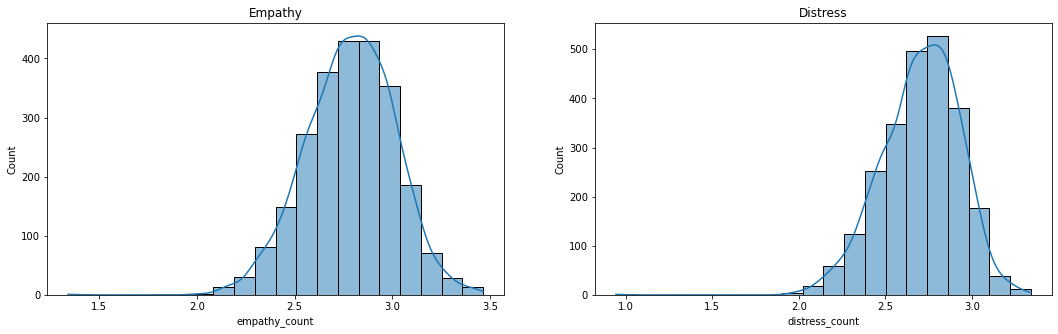

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))

sns.histplot(data=train_essay_data['empathy_count'], bins=20, kde=True, ax=ax1).set(title="Empathy")
sns.histplot(data=train_essay_data['distress_count'], bins=20, kde=True, ax=ax2).set(title="Distress")

plt.plot()

In [27]:
print("# unique values for empathy in Train set: %d"%train_essay_data["empathy"].nunique())
print("# unique values for distress in Train set: %d"%train_essay_data["distress"].nunique())
print("# unique values for empathy in Dev set: %d"%dev_essay_data["empathy"].nunique())
print("# unique values for distress in Dev set: %d"%dev_essay_data["distress"].nunique())

# unique values for empathy in Train set: 61
# unique values for distress in Train set: 49
# unique values for empathy in Dev set: 35
# unique values for distress in Dev set: 46


In [28]:
# TODO: word cloud for empathy as in previous dataset

Demographical features exploration

Gender statistics

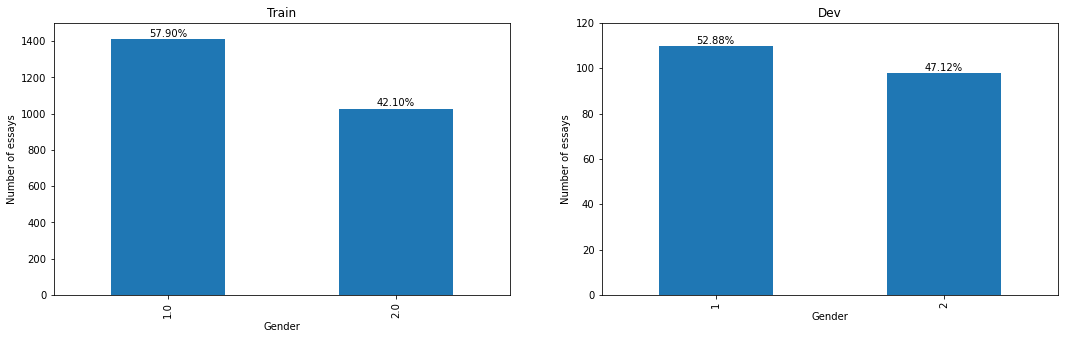

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
train_essay_data['gender'].value_counts().plot(kind='bar', title="Train", xlabel='Gender', ylabel='Number of essays', ax=ax1)
add_percentages(ax1, len(train_essay_data['gender']), 1500, 15, rotation=0)
dev_essay_data['gender'].value_counts().plot(kind='bar', title="Dev", xlabel='Gender', ylabel='Number of essays', ax=ax2)
add_percentages(ax2, len(dev_essay_data['gender']), 120, 1, rotation=0)

Education statistics

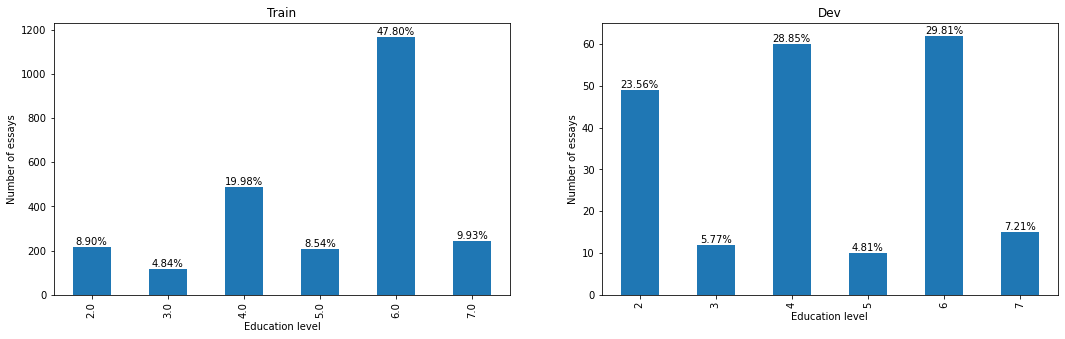

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
train_essay_data['education'].value_counts().sort_index().plot(kind='bar', title="Train", xlabel='Education level', ylabel='Number of essays', ax=ax1)
add_percentages(ax1, len(train_essay_data['education']), 1230, 10, rotation=0)
dev_essay_data['education'].value_counts().sort_index().plot(kind='bar', title="Dev", xlabel='Education level', ylabel='Number of essays', ax=ax2)
add_percentages(ax2, len(dev_essay_data['education']), 65, 0.5, rotation=0)

Race statistics

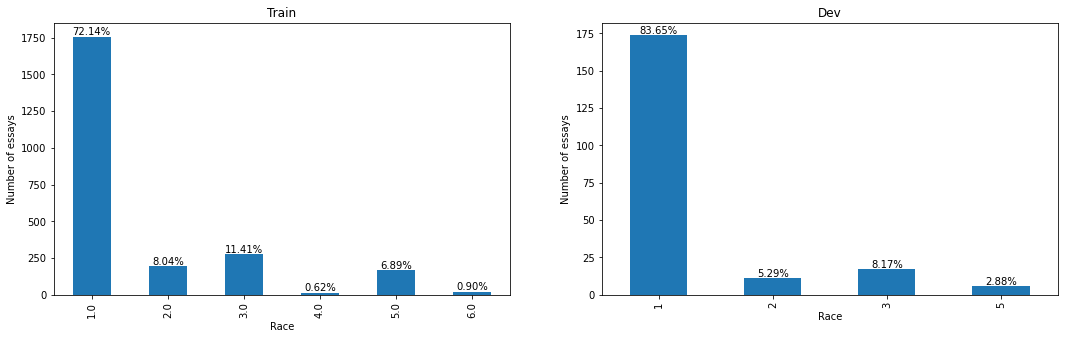

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
train_essay_data['race'].value_counts().sort_index().plot(kind='bar', title="Train", xlabel='Race', ylabel='Number of essays', ax=ax1)
add_percentages(ax1, len(train_essay_data['race']), 1850, 10, rotation=0)
dev_essay_data['race'].value_counts().sort_index().plot(kind='bar', title="Dev", xlabel='Race', ylabel='Number of essays', ax=ax2)
add_percentages(ax2, len(dev_essay_data['race']), 182, 1, rotation=0)

Age statistics

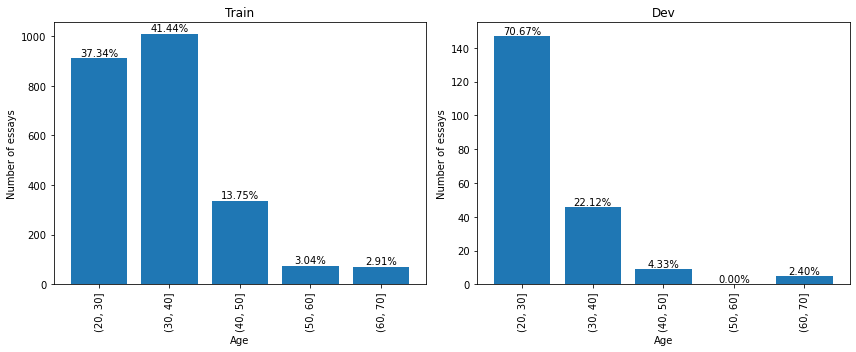

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

age_bins = [20, 30, 40, 50, 60, 70]

train_essay_data['age'] = pd.to_numeric(train_essay_data['age'], errors='coerce')
train_age_counts = pd.cut(train_essay_data['age'], age_bins).value_counts().sort_index()

dev_essay_data['age'] = pd.to_numeric(dev_essay_data['age'], errors='coerce')
dev_age_counts = pd.cut(dev_essay_data['age'], age_bins).value_counts().sort_index()

ax1.bar(train_age_counts.index.astype(str), train_age_counts.values)
ax1.set_title('Train')
ax1.set_xlabel('Age')
ax1.set_ylabel('Number of essays')
add_percentages(ax1, len(train_essay_data['age']), 1055, 10, rotation=0)

ax2.bar(dev_age_counts.index.astype(str), dev_age_counts.values)
ax2.set_title('Dev')
ax2.set_xlabel('Age')
ax2.set_ylabel('Number of essays')
add_percentages(ax2, len(dev_essay_data['age']), 155, 1, rotation=0)

ax1.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

Income statistics

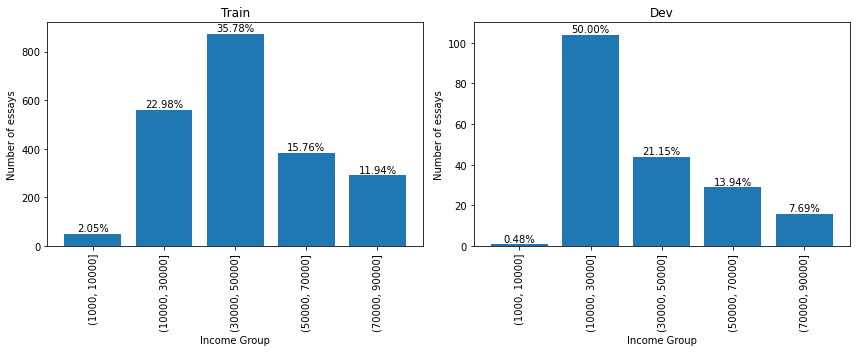

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

income_bins = [1000, 10000, 30000, 50000, 70000, 90000]

train_essay_data['income'] = pd.to_numeric(train_essay_data['income'], errors='coerce')
train_income_counts = pd.cut(train_essay_data['income'], income_bins).value_counts().sort_index()

dev_essay_data['income'] = pd.to_numeric(dev_essay_data['income'], errors='coerce')
dev_income_counts = pd.cut(dev_essay_data['income'], income_bins).value_counts().sort_index()

ax1.bar(train_income_counts.index.astype(str), train_income_counts.values)
ax1.set_title('Train')
ax1.set_xlabel('Income Group')
ax1.set_ylabel('Number of essays')
add_percentages(ax1, len(train_essay_data['income']), 920, 10, rotation=0)

ax2.bar(dev_income_counts.index.astype(str), dev_income_counts.values)
ax2.set_title('Dev')
ax2.set_xlabel('Income Group')
ax2.set_ylabel('Number of essays')
add_percentages(ax2, len(dev_essay_data['income']), 110, 1, rotation=0)

ax1.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

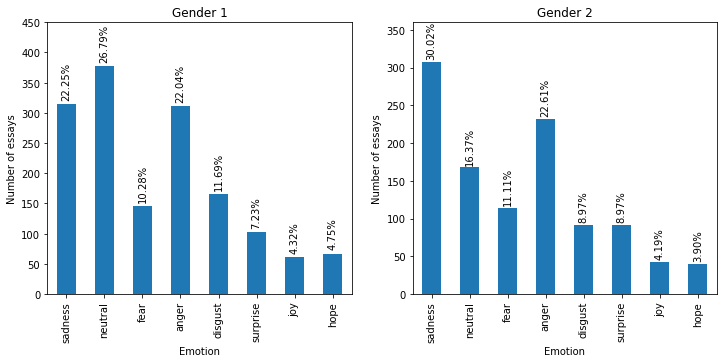

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
train_essay_data[train_essay_data['gender']==1][emotions].sum().plot(
	kind='bar',
	xlabel='Emotion',
	ylabel='Number of essays',
	title='Gender 1',
	ax=ax1
	)
add_percentages(ax1, len(train_essay_data[train_essay_data['gender']==1]), 450, 10, rotation=90)
train_essay_data[train_essay_data['gender']==2][emotions].sum().plot(
	kind='bar',
	xlabel='Emotion',
	ylabel='Number of essays',
	title='Gender 2',
	ax=ax2
	)
add_percentages(ax2, len(train_essay_data[train_essay_data['gender']==2]), 360, 6, rotation=90)

[Text(0.5, 1.0, 'Gender 2')]

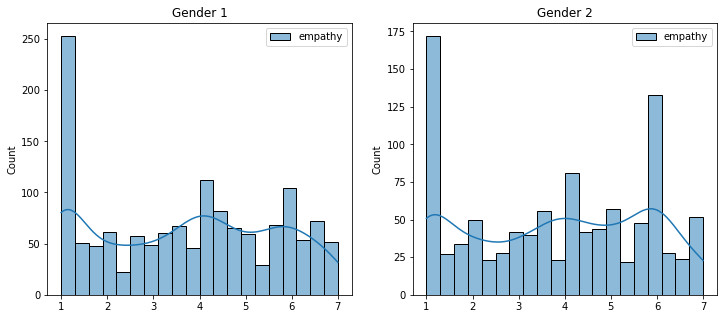

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data=train_essay_data[train_essay_data['gender']==1][["empathy"]], bins=20, kde=True, ax=ax1).set(title="Gender 1")
sns.histplot(data=train_essay_data[train_essay_data['gender']==2][["empathy"]], bins=20, kde=True, ax=ax2).set(title="Gender 2")

[Text(0.5, 1.0, 'Gender 2')]

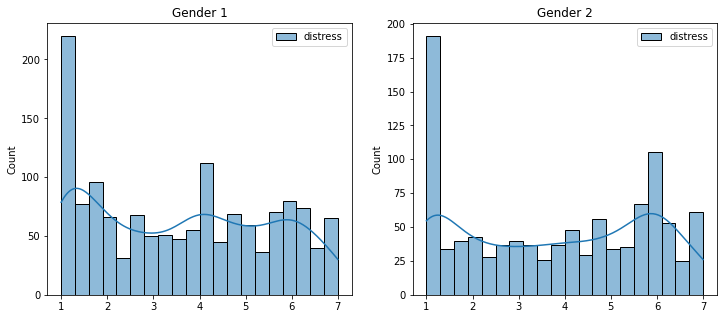

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data=train_essay_data[train_essay_data['gender']==1][["distress"]], bins=20, kde=True, ax=ax1).set(title="Gender 1")
sns.histplot(data=train_essay_data[train_essay_data['gender']==2][["distress"]], bins=20, kde=True, ax=ax2).set(title="Gender 2")

Compute correlations between targets and demographical features

In [37]:
targets = ['empathy', 'distress'] + emotions

def compute_correlation(data, attr):
    correlations = {}
    for target in targets:
        if target != 'empathy' and target != 'distress':
            targets_col = data[target].astype('category').cat.codes
        else:
            targets_col = data[target]
        if attr == 'age' or attr == 'income':
            attr_col = data[attr]
        else:
            attr_col = data[attr].astype('category').cat.codes
        correlations[target] = stats.pearsonr(
            attr_col, # TODO: categorical?
            targets_col,
        )
    correlations_df = pd.DataFrame(correlations).T
    correlations_df.columns = ['pearson', 'p-value']
    correlations_df.sort_values(by='pearson', ascending=False, inplace=True)
    return correlations_df

In [38]:
compute_correlation(train_essay_data, 'gender')

,pearson,p-value
sadness,0.087940,1.377229e-05
distress,0.049075,1.539849e-02
surprise,0.031700,1.177032e-01
empathy,0.030361,1.340347e-01
fear,0.013372,5.093756e-01
anger,0.006774,7.381870e-01
joy,-0.003228,8.734632e-01
hope,-0.020477,3.122750e-01
disgust,-0.043835,3.047216e-02
neutral,-0.123329,1.006002e-09


In [39]:
compute_correlation(train_essay_data, 'age')

,pearson,p-value
anger,0.112045,2.925273e-08
surprise,0.031999,1.142720e-01
fear,0.011615,5.665637e-01
joy,0.005161,7.989913e-01
neutral,-0.023123,2.538491e-01
empathy,-0.026889,1.845286e-01
disgust,-0.027497,1.747867e-01
hope,-0.053123,8.716295e-03
distress,-0.062125,2.153136e-03
sadness,-0.077614,1.254122e-04


In [40]:
compute_correlation(train_essay_data, 'income')

,pearson,p-value
surprise,0.029383,0.147036
joy,0.020353,0.315228
sadness,0.019888,0.326399
neutral,0.018403,0.363832
empathy,0.002966,0.883645
disgust,-0.001658,0.934790
distress,-0.001999,0.921444
hope,-0.021223,0.294978
anger,-0.033211,0.101187
fear,-0.044552,0.027854


In [41]:
compute_correlation(train_essay_data, 'education')

,pearson,p-value
sadness,0.084520,0.000029
joy,0.021604,0.286383
neutral,0.009185,0.650394
distress,-0.002375,0.906704
empathy,-0.006875,0.734451
surprise,-0.011511,0.570047
anger,-0.017375,0.391249
fear,-0.021560,0.287378
disgust,-0.033532,0.097937
hope,-0.048973,0.015614


In [42]:
compute_correlation(train_essay_data, 'race')

,pearson,p-value
neutral,0.080514,0.000069
empathy,0.060999,0.002591
joy,0.050732,0.012254
hope,0.045235,0.025544
distress,0.040361,0.046341
disgust,0.005979,0.768001
anger,-0.028029,0.166590
fear,-0.029139,0.150415
sadness,-0.035346,0.081066
surprise,-0.044171,0.029221


Lexicon counts distributions

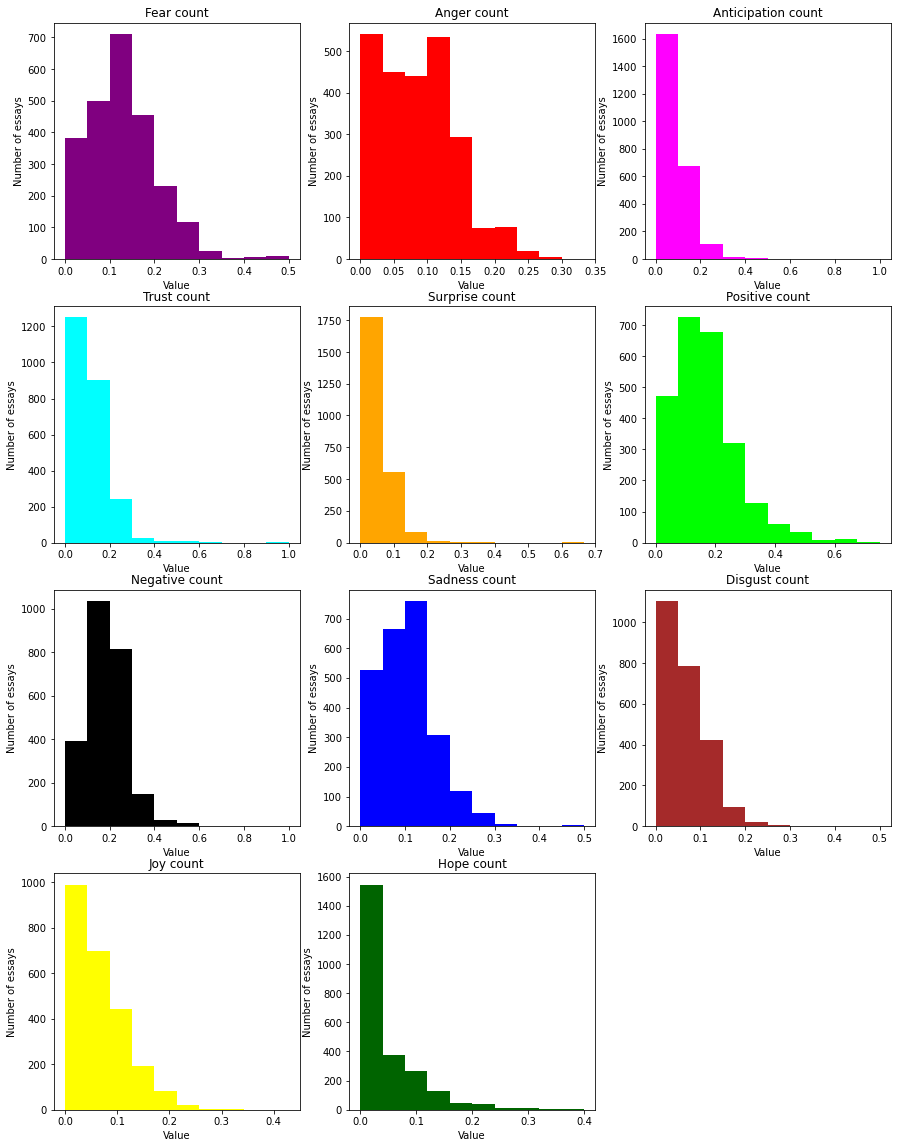

In [60]:
LEXICON_EMOTIONS = [
	'fear',
	'anger',
	'anticipation',
	'trust',
	'surprise',
	'positive',
	'negative',
	'sadness',
	'disgust',
	'joy',
	'hope'
]
COLORS = [
    'purple',
    'red',
    'magenta',
    'cyan',
    'orange',
    'lime',
    'black',
    'blue',
    'brown',
    'yellow',
    'darkgreen']
fig, axs = plt.subplots(4, 3, figsize=(15, 20))
row_count = 0
col_count = 0
for color, emotion in zip(COLORS, LEXICON_EMOTIONS):
    ax = train_essay_data[f'{emotion}_count'].plot.hist(ax=axs[row_count][col_count],color=color)
    ax.set_xlabel("Value")
    ax.set_ylabel("Number of essays")
    ax.set_title(f"{emotion.title()} count")
    if col_count == 2:
        row_count += 1
        col_count = 0
    else:
        col_count += 1
fig.delaxes(axs[3][2])


In [44]:
# TODO:
# word clouds
# uniformare count-number of essays ed assicurarsi che non serva prendere speaker univoci
# distribuzioni emozioni/emp/dist in base ad altri attributi anagrafici (?)